grossings :  2463799.0


<Axes: title={'center': 'qspp'}, xlabel='Description'>

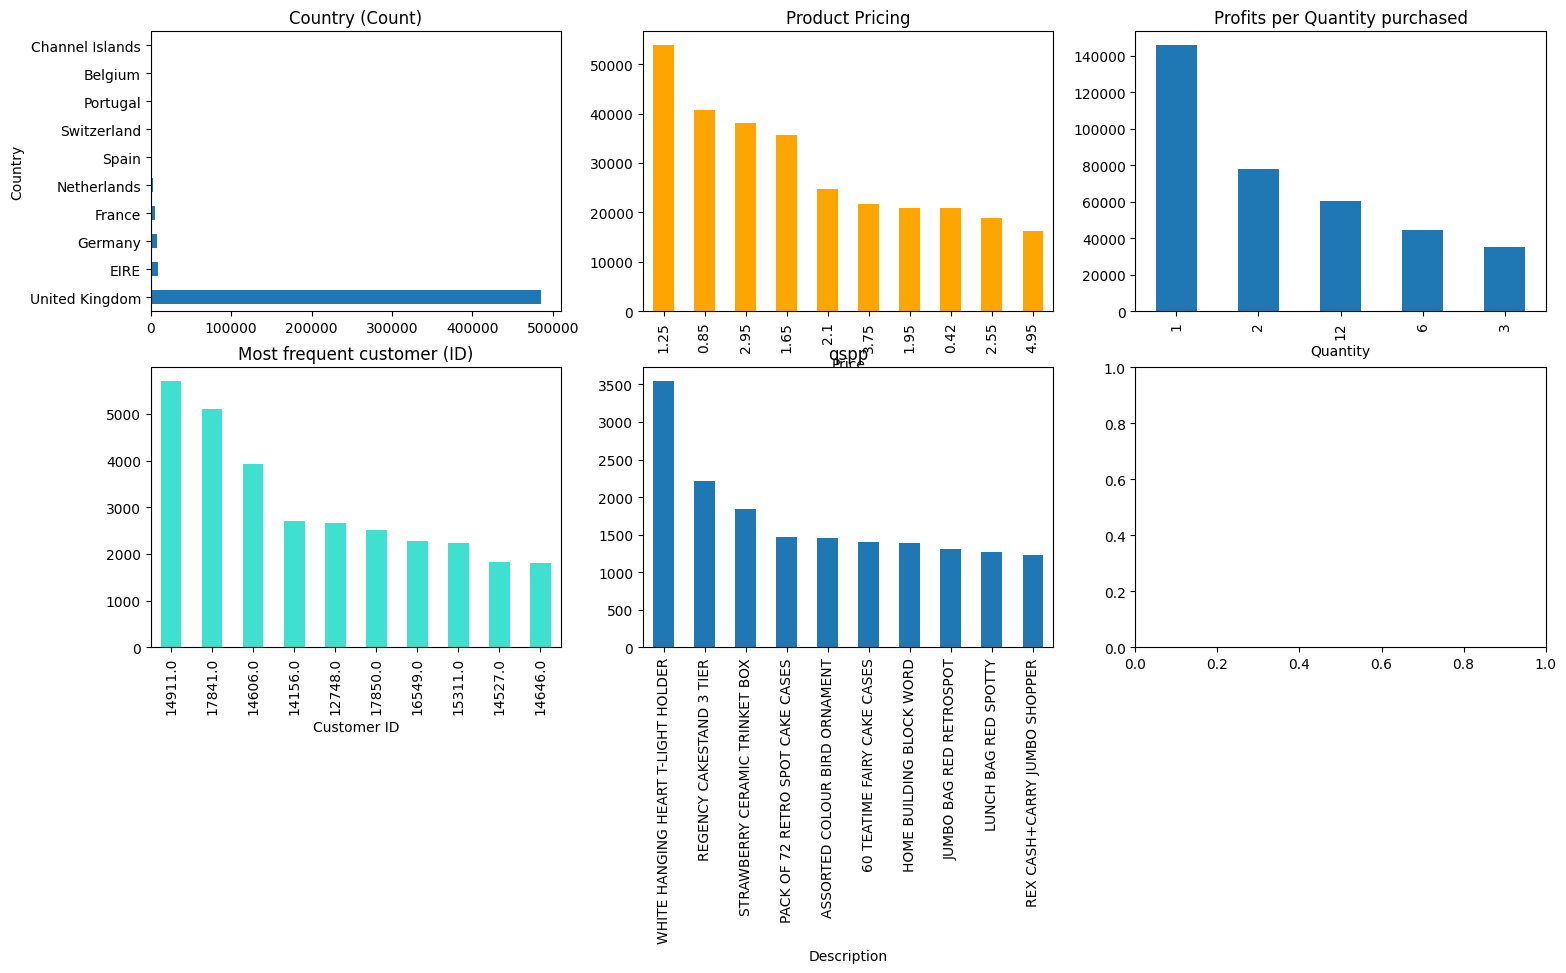

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, ax_array = plt.subplots(2,3,figsize=(18,8))
(ax1,ax2,ax3),(ax4,ax5,ax6) = ax_array

retail = pd.read_csv("online_retail.csv")

count1 = retail["Country"].value_counts().head(10)
count1.plot(kind="barh",ax=ax1,title="Country (Count)")

count2 = retail['Price'].astype(float).value_counts().head(10)
count2.plot(kind="bar",ax=ax2,title="Product Pricing",color="orange")

count3 = retail["Quantity"].value_counts().head()
count3.plot(kind="bar",ax=ax3,title="Profits per Quantity purchased")

count4 = retail["Customer ID"].value_counts().head(10)
count4.plot(kind="bar",ax=ax4,title="Most frequent customer (ID)",color="turquoise")

count5 = retail["Price"].astype(float)
s = sum(count5)
q = s//1
print("grossings : ", q)

count6 = retail["Description"].value_counts().head(10)
count6.plot(kind="bar",ax=ax5,title="qspp")




In [ ]:
import tensorflow as tf
import numpy as np
import cv2
# Load an preprocess MNIST data
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0

#Define model
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#Compile and train
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,y_train,epochs=5)

#Evaluate
model.evaluate(x_test,y_test)

#Save weights using checkpoint format
checkpoint_path = "mist_checkpoint"
checkpoint=tf.train.Checkpoint(model=model)
checkpoint.save(checkpoint_path)

#Drawing window setup
drawing=False
window_name="Draw a Digit (Press ESC to predict, Q to quit)"
canvas = np.ones((280,280),dtype=np.uint8) * 255 #10x scale for easier drawing
def draw(event,x,y,flags,param):
  global drawing, canvas
  if event == cv2.EVENT_LBUTTONDOWN:
    drawing = True
  elif event ==cv2.EVENT_MOUSEMOVE:
    if drawing:
      cv2.circle(canvas,(x,y),10,0,-1)
  elif event == cv2.EVENT_LBUTTONUP:
    drawing= False

cv2.namedWindow(window_name)
cv2.setMouseCallback(window_name,draw)

while True:
  cv2.imshow(window_name,canvas)
  key=cv2.waitkey(1) & 0xFF
  if key == 27: #ESC to predict
  #Preprocess the drawn image
    img=cv2.resize(canvas,(28,28),interpolation=cv2.INTER_AREA)
    img=img/255.0
    img=np.expand_dims(img,axis=0)

    #Predict
    prediction=model.predict(img)
    predicted_class=np.argmax(prediction,axis=1)[0]
    print(f"Predicted digit: {predicted_class}")

    #Reset canvas
    cavas = np.ones((288,280),dtype=np.uint8) * 255
  elif key == ord("q"): #Q to quit
    break

cv2.destroyAllWindows()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8775 - loss: 0.4334
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9659 - loss: 0.1172
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9753 - loss: 0.0821
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9834 - loss: 0.0557
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9867 - loss: 0.0433
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.0892
